In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [47]:
horse_data = pd.read_csv("data/horse.csv")
training_data = pd.read_csv("data/train.csv")
#read in test data from kaggle
test_data = pd.read_csv("data/test.csv")


In [48]:

horse_data = pd.concat([horse_data, training_data], axis=0, ignore_index=True)


In [49]:
print(horse_data.columns)
print(test_data.columns)

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'id'],
      dtype='object')
Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein',

In [50]:
#euthenized means died so reduce the number of outcomes from 3 to 2
horse_data["outcome"].replace("euthanized", "died", inplace=True)

horse_data['id'] = horse_data['id'].fillna(0)

# Reorder the columns
column_order = ['id'] + [col for col in horse_data.columns if col != 'id']
horse_data = horse_data[column_order]



horse_data.head()


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0.0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,0.0,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,0.0,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,0.0,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,0.0,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [51]:
# Assuming X contains your reference DataFrame and test_data contains the DataFrame to be compared

# Get the set of columns in X and test_data
columns_in_horse = set(horse_data.columns)
columns_in_test_data = set(test_data.columns)

# Find the columns that are in X but not in test_data
missing_columns = columns_in_horse - columns_in_test_data

# Print the missing columns
print("Missing Columns:", missing_columns)

Missing Columns: {'outcome'}


In [52]:
print(len(test_data.columns))
print(len(horse_data.columns))

28
29


In [53]:
horse_data.dtypes

id                       float64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [54]:
#check for null values
print(horse_data.columns[horse_data.isnull().any()])

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities',
       'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
       'peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein'],
      dtype='object')


In [55]:
#fill any na values in numerical columns with the median value of the column 
numerical_features = horse_data.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    horse_data[feature].fillna(horse_data[feature].median(), inplace=True)

#fill any na values in categorical column with none
categorical_features = horse_data.select_dtypes(include=[np.object]).columns.tolist()
for feature in categorical_features:
    horse_data[feature].fillna('None', inplace=True)


#check if null values are gone
print(horse_data.columns[horse_data.isnull().any()])

Index([], dtype='object')


C:\Users\sarah\AppData\Local\Temp\ipykernel_8148\704253132.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = horse_data.select_dtypes(include=[np.object]).columns.tolist()


In [56]:
# Get columns that are of type "object" for both DataFrames
object_columns_test_data = test_data.select_dtypes(include=['object'])
object_columns_horse_data = horse_data.select_dtypes(include=['object'])

# Loop through the common columns and check if they have the same unique values
common_columns = object_columns_test_data.columns.intersection(object_columns_horse_data.columns)

for column in common_columns:
    unique_values_test_data = test_data[column].unique()
    unique_values_horse_data = horse_data[column].unique()
    
    if set(unique_values_test_data) != set(unique_values_horse_data):
        print(f"Column '{column}' has different unique values between test_data and horse_data.")


Column 'pain' has different unique values between test_data and horse_data.
Column 'peristalsis' has different unique values between test_data and horse_data.
Column 'nasogastric_reflux' has different unique values between test_data and horse_data.
Column 'rectal_exam_feces' has different unique values between test_data and horse_data.


In [57]:
print(horse_data["rectal_exam_feces"].unique())
print(test_data["rectal_exam_feces"].unique())

['decreased' 'absent' 'normal' 'None' 'increased' 'serosanguious']
['normal' 'decreased' 'absent' 'None' 'increased']


In [58]:
unique_values = horse_data['rectal_exam_feces'].unique()
print(unique_values)

['decreased' 'absent' 'normal' 'None' 'increased' 'serosanguious']


In [59]:
horse_data['rectal_exam_feces'].value_counts()


absent           572
decreased        317
None             292
normal           290
increased         62
serosanguious      1
Name: rectal_exam_feces, dtype: int64

In [60]:
# Drop rows where 'rectal_exam_feces' is 'serosanguious'
horse_data = horse_data[horse_data['rectal_exam_feces'] != 'serosanguious']


In [61]:
print(horse_data["nasogastric_reflux"].unique())
print(test_data["nasogastric_reflux"].unique())

['None' 'less_1_liter' 'none' 'more_1_liter' 'slight']
['none' 'more_1_liter' 'less_1_liter' 'None']


In [62]:
horse_data["nasogastric_reflux"].replace({'None': 'none', 'slight': 'none'}, inplace=True)
test_data["nasogastric_reflux"].replace({'None': 'none'}, inplace=True)


In [63]:
print(horse_data["peristalsis"].unique())
print(test_data["peristalsis"].unique())

['absent' 'hypomotile' 'None' 'hypermotile' 'normal' 'distend_small']
['hypomotile' 'absent' 'hypermotile' 'None' 'normal']


In [64]:
horse_data = horse_data[horse_data['peristalsis'] != 'distend_small']


In [65]:
print(horse_data["pain"].unique())
print(test_data["pain"].unique())

['extreme_pain' 'mild_pain' 'depressed' 'None' 'severe_pain' 'alert'
 'slight']
['mild_pain' 'depressed' 'severe_pain' 'extreme_pain' 'None' 'moderate'
 'alert']


In [66]:
horse_data["pain"] = horse_data["pain"].replace('slight', 'moderate')

In [67]:
#check that columns now have the same values
object_columns_test_data = test_data.select_dtypes(include=['object'])
object_columns_horse_data = horse_data.select_dtypes(include=['object'])

# Loop through the common columns and check if they have the same unique values
common_columns = object_columns_test_data.columns.intersection(object_columns_horse_data.columns)

for column in common_columns:
    unique_values_test_data = test_data[column].unique()
    unique_values_horse_data = horse_data[column].unique()
    
    if set(unique_values_test_data) != set(unique_values_horse_data):
        print(f"Column '{column}' has different unique values between test_data and horse_data.")

In [68]:
# Separate features (X) and target variable (y) for training data
X = horse_data.drop(columns=["outcome"])
y = horse_data["outcome"]

label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

In [69]:
object_columns_X = X.select_dtypes(include=['object'])

# Iterate through categorical columns and encode them
for column in object_columns_X:
    X[column] = label_encoder.fit_transform(X[column])


In [70]:
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

In [71]:
print(len(X.columns))

28


In [72]:
#define categorical columns and split the data
#categorical_columns = list(X.loc[:, X.dtypes == 'object'].columns)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=42)


In [73]:

# # Create the GradientBoostingClassifier model
gradient_model = GradientBoostingClassifier(random_state=42)

# # Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1],   # Learning rate
    'max_depth': [6, 8],            # Maximum depth of the trees
}

# # Create the GridSearchCV object
grid_search = GridSearchCV(gradient_model, param_grid, cv=5, verbose=3, scoring='accuracy')

# # Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.645 total time=   8.8s
[CV 2/5] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.673 total time=  11.5s
[CV 3/5] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.661 total time=   8.5s
[CV 4/5] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.682 total time=   7.6s
[CV 5/5] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.690 total time=   7.6s
[CV 1/5] END learning_rate=0.01, max_depth=6, n_estimators=300;, score=0.686 total time=  22.7s
[CV 2/5] END learning_rate=0.01, max_depth=6, n_estimators=300;, score=0.710 total time=  21.2s
[CV 3/5] END learning_rate=0.01, max_depth=6, n_estimators=300;, score=0.727 total time=  22.7s
[CV 4/5] END learning_rate=0.01, max_depth=6, n_estimators=300;, score=0.673 total time=  21.6s
[CV 5/5] END learning_rate=0.01, max_depth=6, n_estimators=300;, score=0.69

In [74]:

#read in model
#model = GradientBoostingClassifier(cat_features=categorical_columns, random_seed = 42, verbose=3)


# best_params = {
#     'n_estimators': 500,  # Increase the number of estimators
#     'learning_rate': 0.1,  # Decrease learning rate
#     'max_depth': 6,  # You can choose an appropriate value
# }

#best model with params
best_gradient_model = GradientBoostingClassifier(random_state = 42, verbose = 3, **best_params)

#fit the data
best_gradient_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0080           22.26s
         2           0.9984           38.87s
         3           0.9892           40.56s
         4           0.9801           41.84s
         5           0.9712           44.05s
         6           0.9625           45.43s
         7           0.9540           53.78s
         8           0.9457           57.54s
         9           0.9375            1.01m
        10           0.9296            1.01m
        11           0.9218            1.05m
        12           0.9141            1.13m
        13           0.9067            1.12m
        14           0.8991            1.16m
        15           0.8917            1.34m
        16           0.8841            1.37m
        17           0.8768            1.44m
        18           0.8695            1.41m
        19           0.8626            1.42m
        20           0.8556            1.41m
        21           0.8488            1.39m
        2

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=500,
                           random_state=42, verbose=3)

In [75]:
#use the model to make predictions on X_test
y_pred = best_gradient_model.predict(X_test)

print(y_pred)

[2 2 0 0 0 0 2 1 2 2 1 2 1 0 2 2 0 0 0 2 0 1 2 1 2 0 0 2 0 2 0 2 2 2 2 0 0
 0 1 2 1 0 0 2 0 2 0 1 0 0 2 1 1 2 2 0 0 2 2 1 2 2 1 2 1 2 1 0 2 0 0 0 2 0
 0 1 0 2 0 0 2 1 0 2 2 2 0 1 2 0 0 0 0 1 2 0 0 2 2 0 2 2 0 2 0 2 2 1 2 0 2
 1 1 0 2 2 2 0 2 2 2 0 0 2 2 2 1 2 2 0 2 2 2 1 1 1 1 1 1 1 2 2 2 0 2 0 1 2
 0 2 0 2 2 2 2 0 2 0 2 1 0 2 1 2 0 2 0 0 2 1 0 0 0 0 0 2 1 2 2 2 1 1 2 0 0
 0 2 2 1 2 2 0 2 0 1 0 0 2 1 2 0 0 1 2 0 2 2 2 2 2 0 2 2 0 2 0 2 0 0 0 2 0
 2 2 1 2 1 2 0 1 1 0 0 2 0 0 0 2 1 2 2 2 2 1 0 2 2 0 2 0 0 0 0 0 0 2 0 2 2
 0 1 0 0 1 0 1 0 0 0 0 2 0 2 1 2 0 1 2 0 2 2 2 2 0 0 2 2 1 0 2 0 2 2 1 2 0
 2 0 1 0 2 0 2 2 0 2 2]


In [76]:
# Calculate f-1 score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score:", f1)


F1 Score: 0.7003257328990228


In [77]:
from sklearn.metrics import precision_score, recall_score

# Assuming you have true labels (y_test) and predicted labels (y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred, average='micro')

# Calculate recall
recall = recall_score(y_test, y_pred, average='micro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Precision: 0.70
Recall: 0.70


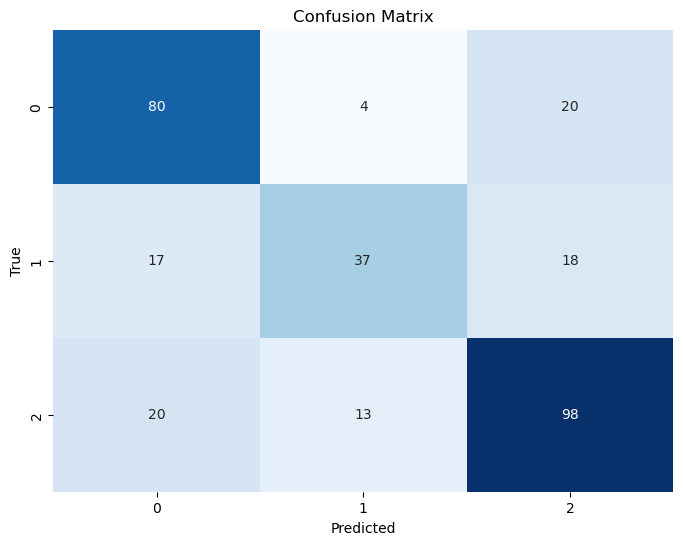

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_test) and predicted labels (y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [79]:
from sklearn.metrics import classification_report

# Assuming you have true labels (y_test) and predicted labels (y_pred)
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.68      0.77      0.72       104
           1       0.69      0.51      0.59        72
           2       0.72      0.75      0.73       131

    accuracy                           0.70       307
   macro avg       0.70      0.68      0.68       307
weighted avg       0.70      0.70      0.70       307



In [80]:
#save the model
import joblib

# Save the trained model to a file
joblib.dump(best_gradient_model, 'gradient_model.pkl')

['gradient_model.pkl']

In [81]:
#load in the model 
loaded_model = joblib.load('gradient_model.pkl')


In [82]:
object_columns_test = test_data.select_dtypes(include=['object'])

# Iterate through categorical columns and encode them
for column in object_columns_test:
    test_data[column] = label_encoder.fit_transform(test_data[column])


In [83]:
#check columns match
print(len(test_data.columns))
print(len(X_train.columns))

28
28


In [84]:
# Assuming X contains your reference DataFrame and test_data contains the DataFrame to be compared

# Get the set of columns in X and test_data
columns_in_X = set(X_train.columns)
columns_in_test_data = set(test_data.columns)

# Find the columns that are in X but not in test_data
missing_columns = columns_in_test_data - columns_in_X

# Print the missing columns
print("Missing Columns:", missing_columns)


Missing Columns: set()


In [85]:
test_predictions = loaded_model.predict(test_data)

test_predictions

array([2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2,

In [86]:
#make dataframe of predictions
submission_df = pd.DataFrame({'id': test_data['id'],
                           'outcome': test_predictions})

submission_df.head()

,id,outcome
0,1235,2
1,1236,2
2,1237,2
3,1238,1
4,1239,2


In [87]:
# undo encoding
submission_df['outcome'] = submission_df['outcome'].replace({
                                                             1: 'lived',
                                                             0: 'died'})

print(len(submission_df))
submission_df.head()

824


,id,outcome
0,1235,euthenized
1,1236,euthenized
2,1237,euthenized
3,1238,lived
4,1239,euthenized


In [88]:
submission_df.to_csv("data/submission_gradientBoost.csv", index=False)


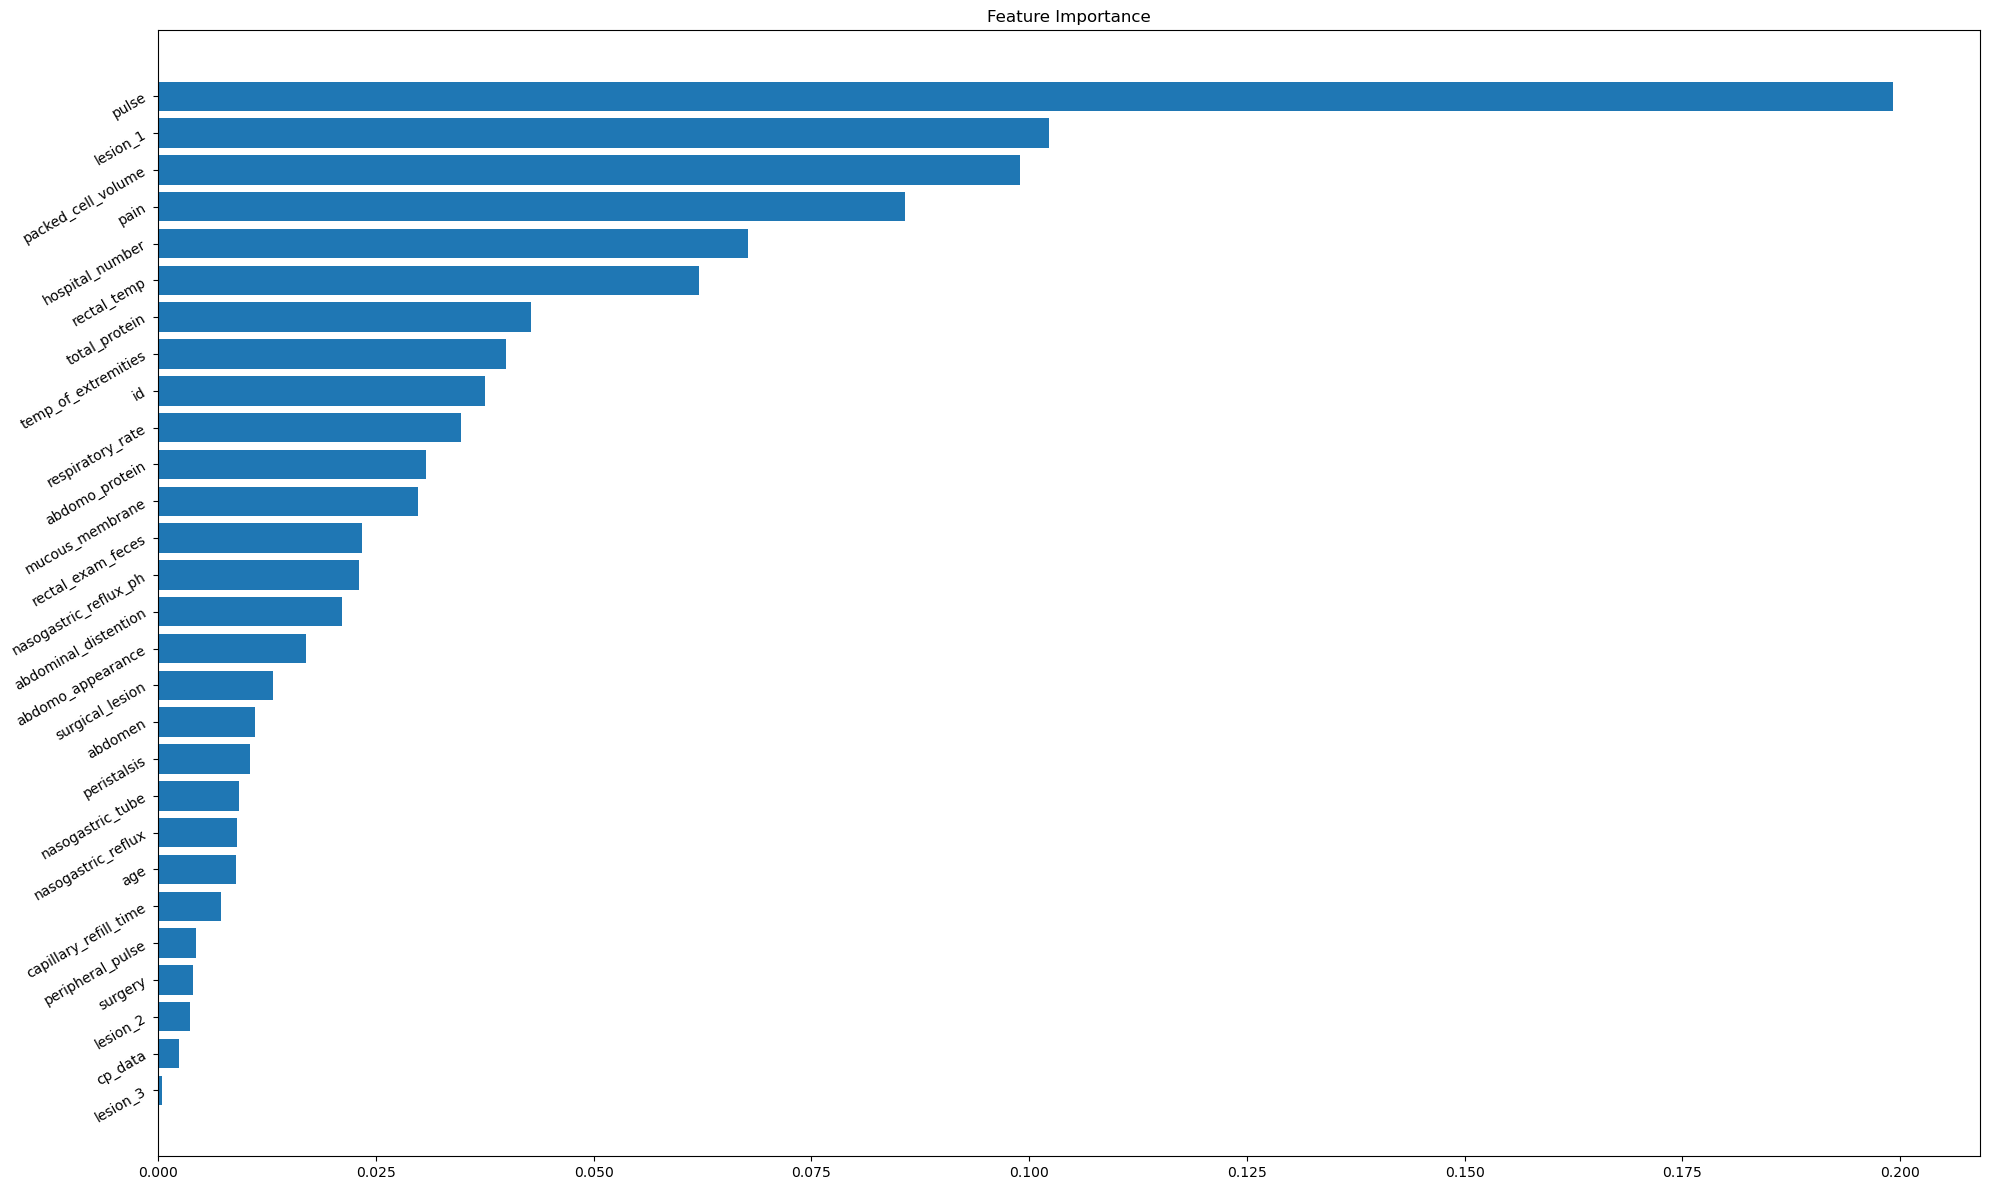

In [44]:
feature_importance = best_gradient_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig, ax = plt.subplots(figsize=(20, 12))

# Use the column names from X_train as feature labels
ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
ax.set_yticks(range(len(sorted_idx)))
ax.set_yticklabels(X_train.columns[sorted_idx], rotation=30)  # Rotate labels to 0 degrees
ax.set_title('Feature Importance')

plt.tight_layout()
plt.show()


In [45]:
feature_importance = best_gradient_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

# List of feature names in ascending order of importance
sorted_features = X_train.columns[sorted_idx]

# Print the bottom N least important features
bottom_n = 20
print(sorted_features[:bottom_n])


Index(['lesion_3', 'cp_data', 'lesion_2', 'surgery', 'peripheral_pulse',
       'capillary_refill_time', 'age', 'nasogastric_reflux',
       'nasogastric_tube', 'peristalsis', 'abdomen', 'surgical_lesion',
       'abdomo_appearance', 'abdominal_distention', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'mucous_membrane', 'abdomo_protein',
       'respiratory_rate', 'id'],
      dtype='object')
